In [1]:
import osiris_utils as ou
import numpy as np
import matplotlib.pyplot as plt

# Example notebook for the `raw data` and `tracks data`

If you haven't already check the `example_Simulation_Diagnostic.ipynb` example, to learn the basic structure of Osiris Utils.

`Raw data` is not yet implemented as part of the `Simulation class`, and there is not yet a class like `Diagnostic` that allows for lazy loading. However, you can access it using the `OsirisRawFile` class.
This class is more low level so it opens a singular hd5 file from its path.

dict_keys(['ene', 'p1', 'p2', 'p3', 'q', 'tag', 'x1'])


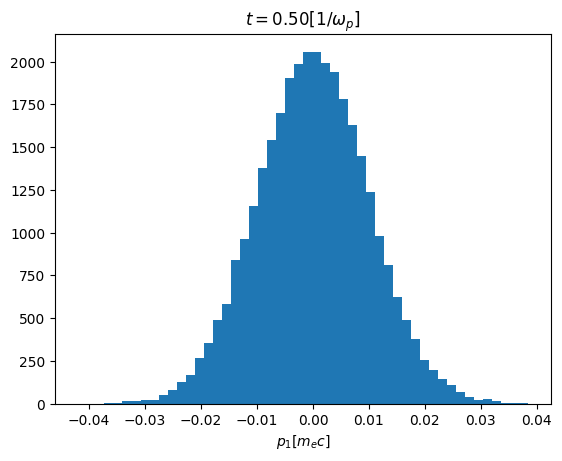

In [2]:
raw = ou.OsirisRawFile("example_data/MS/RAW/electrons/RAW-electrons-000050.h5")

# Available keys to access raw data
print(raw.data.keys())

# Let's plot the distribution of the momentum in x1 direction
fig, ax = plt.subplots()
ax.hist(raw.data["p1"], bins=50)
# Osiris utils provides LaTex formated units and labels
ax.set_xlabel("${}$".format(raw.labels["p1"]) + "$[{}]$".format(raw.units["p1"]))
ax.set_title("$t = {:.2f}$".format(raw.time[0])+ "$[{}]$".format(raw.time[1]))
plt.show()

Tracks diagnostics can be used to follow the trajectories of a subset of particles, Osiris Utils allows you to select the particles you want the follow from raw data.
Don't forget to activate particle tagging in your simulation.

In [3]:
# Create a file with the 10 random particle tags to use with the Osiris tracks diagnostic
raw.raw_to_file_tags("example_data/file_tags.tags", type="random", n_tags=10)

# Alternatively we can supply a mask to choose from a subset of particles
mask = raw.data["p1"] > 0.025
raw.raw_to_file_tags("example_data/file_tags.tags", type="all", mask=mask)

# If you want to create the list from a list of tags checkout:
# ou.utils.create_file_tags(filename, tags_array)


Tag_file created:  example_data/file_tags.tags
Tag_file created:  example_data/file_tags.tags


Now that we have a `file_tags` file with the particles we want to track, we will rerrun the simulation with the tracks diagnostic.

We can access this data using the `Track_Diagnostic` class, or with the `Simulation` class.

The `Track_Diagnostic` class is slightly different than the `Diagnostic` class, you cannot do operations with tracks, use postprocessing or add custom diagnostics since this is a different type of data than grid files.

The `Track_Diagnostic` allows lazy loading of the data. Even though there is only 1 tracks file per specie it is still useful because they are quite large.

In [4]:
# You can access track data like this
deck = ou.InputDeckIO("example_data/thermal.1d", verbose=False)
tracks = ou.Track_Diagnostic("example_data", species=ou.Specie("electrons", -1), input_deck=deck)

# You can also use the Simulation class for extra commodity
sim = ou.Simulation("example_data/thermal.1d")
tracks = sim["electrons"]["tracks"]

# Now let's access data, let's print p1 for first 4 particles at time step 50
print(tracks["p1"][0:4, 50])
# As expected in time step 50, all the selected particles have p1 > 0.025

# Let's print all the data keys you can access
print(tracks.quants)

[0.0295146  0.02526636 0.0273789  0.03175705]
['t', 'q', 'ene', 'x1', 'p1', 'p2', 'p3', 'E1', 'E2', 'E3', 'B1', 'B2', 'B3']


Loading data from tracks file.


[]

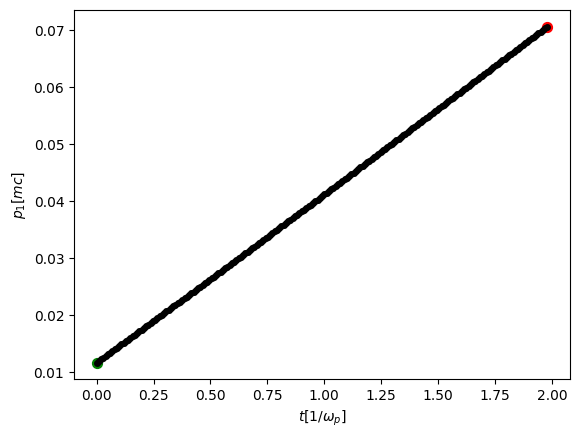

In [5]:
# Now let's plot the trajectory of a particle

x = tracks["x1"][0, :]

# Until now we have been accessing data by always reading the file but we can load the data
tracks.load_all()

# Let's get the times of each iteration ( this way just works with loaded data )
# For lazy loading you would use >>> t = tracks["t"][0, :]
t = tracks.time

def plot_trajectory():
    fig, ax = plt.subplots()
    # Plot the trajectory
    ax.plot(t, x, marker='o', linestyle='-', color='black', markersize=4, label='Trajectory')

    # Highlight start and end points
    ax.scatter(t[0], x[0], color='g', s=50, label='Start')
    ax.scatter(t[-1], x[-1],  color='r', s=50, label='End')

    # Labels and title
    ax.set_ylabel("${}$".format(tracks.labels["p1"]) + "$[{}]$".format(tracks.units["p1"]))
    ax.set_xlabel("${}$".format(tracks.labels["t"])+ "$[{}]$".format(tracks.units["t"]))
    
plot_trajectory()
plt.plot()

# Not a very interesting plot but it is what it is

Finally, if you are an OG Osiris user and you miss the old tracks files (where information is legible because there are no itermaps) you can transform your track file into the old version using:

In [6]:
ou.utils.convert_tracks("example_data/MS/TRACKS/electrons-tracks.h5")

# It created a new file where each particle is stored in a separate folder, with datasets for each quantity.  

Track file converted to the old, more readable format:  example_data/MS/TRACKS/electrons-tracks-v2.h5


'example_data/MS/TRACKS/electrons-tracks-v2.h5'